# Final Project: Most Streamed Songs on Spotify 2023 ~ An Analysis 

Here's some Exploratory Analysis of the Data to get a better understanding of the relationship between these variables

In [ ]:
#All Necessary Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler  

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV  # this is a new method
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance

In [3]:
#Read CSV File

music_df = pd.read_csv('spotify-2023.csv', encoding = 'latin1', sep=',')
music_df = music_df.dropna()
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            817 non-null    object
 1   artist(s)_name        817 non-null    object
 2   artist_count          817 non-null    int64 
 3   released_year         817 non-null    int64 
 4   released_month        817 non-null    int64 
 5   released_day          817 non-null    int64 
 6   in_spotify_playlists  817 non-null    int64 
 7   in_spotify_charts     817 non-null    int64 
 8   streams               817 non-null    object
 9   in_apple_playlists    817 non-null    int64 
 10  in_apple_charts       817 non-null    int64 
 11  in_deezer_playlists   817 non-null    object
 12  in_deezer_charts      817 non-null    int64 
 13  in_shazam_charts      817 non-null    object
 14  bpm                   817 non-null    int64 
 15  key                   817 non-null    object


In [4]:
music_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [5]:
#Identify unique values --> code copied from Assignment 4
for column in music_df.columns:
    unique_values = music_df[column].unique()
    print(f"\nUnique values in '{column}':\n{unique_values}")


#Encode non-numeric values 

music_df_dummy = pd.get_dummies(music_df)

key_values = {'C': 0, 'C#': 1, "D": 2, "D#": 3, "E": 4, "F": 5, "F#": 6, "G": 7, "G#": 8, "A": 9, "A#": 10, "B": 11}
mode_values = {'Major': 0, 'Minor': 1}

key_encoder = music_df['key'].map(key_values)
mode_encoder = music_df['mode'].map(mode_values)

music_df['Key_Type'] = key_encoder 
music_df['Mode_Type'] = mode_encoder 

display(music_df)



Unique values in 'track_name':
['Seven (feat. Latto) (Explicit Ver.)' 'LALA' 'vampire' 'Cruel Summer'
 'WHERE SHE GOES' 'Sprinter' 'Ella Baila Sola' 'Columbia' 'fukumean'
 'La Bebe - Remix' 'un x100to' 'Super Shy' 'Daylight' 'Kill Bill'
 'Cupid - Twin Ver.' 'Classy 101' 'Like Crazy' 'LADY GAGA'
 'I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From The '
 'Peso Pluma: Bzrp Music Sessions, Vol. 55'
 'Popular (with Playboi Carti & Madonna) - The Idol Vol. 1 (Music from the HBO Original Series)'
 'SABOR FRESA' 'Calm Down (with Selena Gomez)' 'MOJABI GHOST' 'Last Night'
 'Dance The Night (From Barbie The Album)' 'Rush' 'TULUM' "Creepin'"
 'Anti-Hero' 'TQG' 'Frï¿½ï¿½gil (feat. Grupo Front' 'Blank Space' 'Style'
 'TQM' 'El Azul' 'Sunflower - Spider-Man: Into the Spider-Verse'
 "I'm Good (Blue)" 'See You Again' 'Angels Like You' 'Die For You'
 'Starboy' 'Die For You - Remix' 'El Cielo' "Baby Don't Hurt Me"
 'AMARGURA' '(It Goes Like) Nanana - Edit' 'Moonlight' 'La Bachata'
 'Tï¿½ï¿' "Boy's a liar 

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Key_Type,Mode_Type
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,Major,80,89,83,31,0,8,4,11,0
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,Major,71,61,74,7,0,10,4,1,0
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,Major,51,32,53,17,0,31,6,5,0
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,Major,55,58,72,11,0,11,15,9,0
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,Minor,65,23,80,14,63,11,6,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,Major,60,24,39,57,0,8,3,9,0
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,Major,42,7,24,83,1,12,6,6,0
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,Major,80,81,67,4,0,8,6,1,0
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,Major,82,67,77,8,0,12,5,1,0


In [6]:
#Make sure numeric values are int
#NOTE: Help from CHATGPT to resolve issue with string bug --> eventually resolved for streams

music_df[~music_df['streams'].str.isnumeric()]
music_df['streams'] = pd.to_numeric(music_df['streams'], errors='coerce')
music_df['streams'] = music_df['streams'].astype('Int64')

In [ ]:
#Look into in_spotify_charts variable and look for repeating ranks among rows
rep_ranks = music_df['in_spotify_charts'].duplicated().sum()
print(rep_ranks)

#Try and reorder rows based on ranking --> get number 1 on top of the dataset

re_music_df = music_df.sort_values('in_spotify_charts')
re_music_df.head()

741


## Exploratory Data Analysis

<Axes: xlabel='streams', ylabel='in_spotify_playlists'>

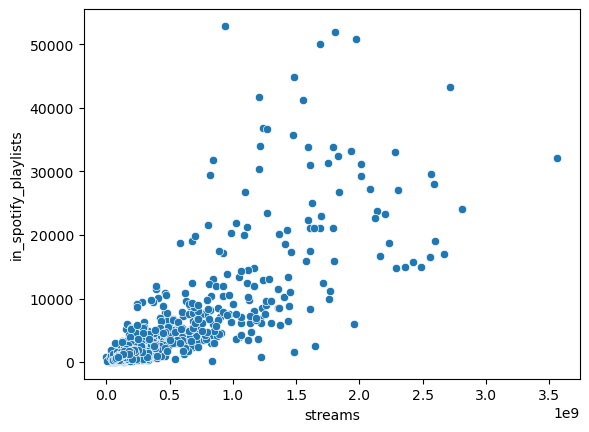

In [9]:
"""I'm interested in looking at the relationship between streams and spotify playlists and streams, charts and playlists, and charts and streams to check for the strength of correlations. Determining if number 
of streams or amount of times a song appears in a playlist is correlated with its rank on Spotify"""

sns.scatterplot(x = 'streams', y= 'in_spotify_playlists', data = music_df)

#NOTE: Maybe consider scaling the axis properly to see if this would impact the plot

sns.scatterplot(x = 'in_spotify_charts', y= 'in_spotify_playlists', data = music_df)
sns.scatterplot(x = 'in_spotify_charts', y= 'streams', data = music_df)




Relationship between the number of times a song is streamed and the number of times a song appears in a Spotify playlist: 

Unsurprisingly, there is a postive correlation between number of streams and how many playlists a song appears in, however, the more often a song is streamed, the less correlated it is with number of times it is added to a playlist. 

Therefore, there is a strong correlation between streams up to around 200,000,000 times and songs appearing in less than 20,000 playlists, yet that correlation gradually becomes weaker as these songs are streamed more often and start appearing in more playlists beyond those values.

In [ ]:
"""Create a countplot of songs in each key and mode""" 

#Number of songs in each key 


#Number of songs in each mode 



In [ ]:
#Map predictors onto histogram in relation to streams, spotify playlists, and rank(?)

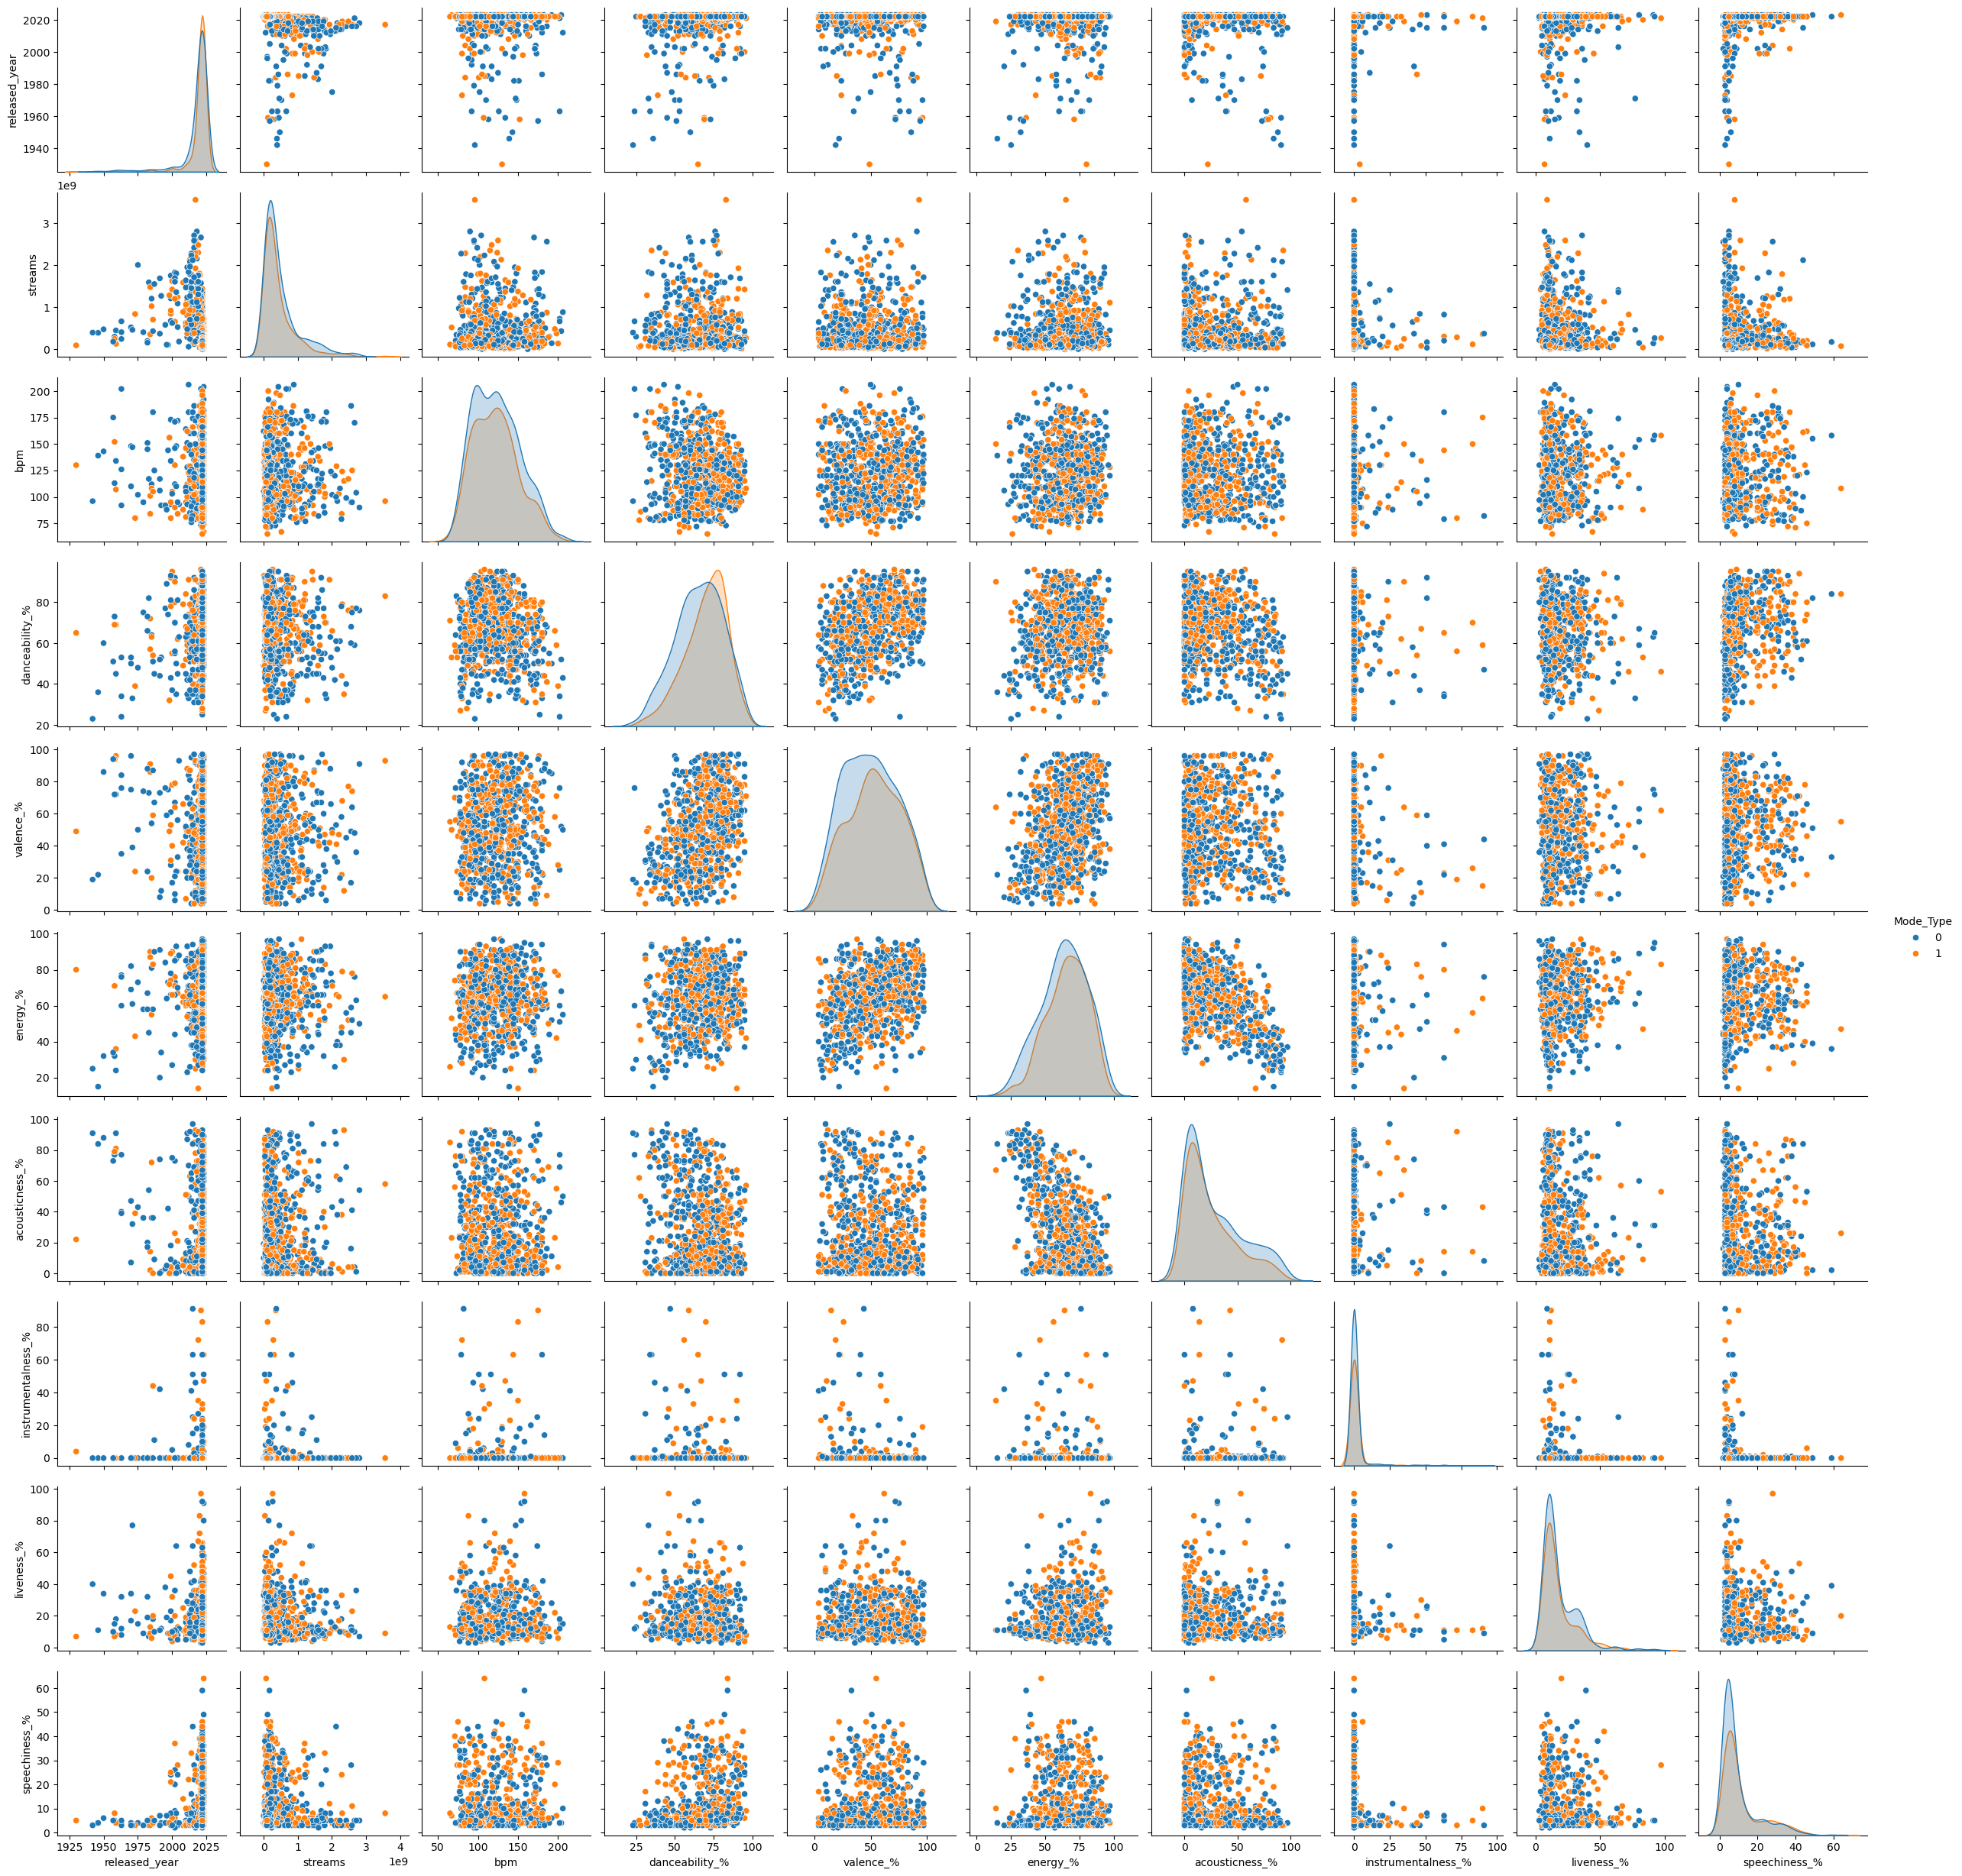

In [ ]:
#Start by creating a confusion matrix (heat map) of each of the corresponding variables

spotify_observe_variables = ['released_year', 'streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

sns.pairplot(music_df, vars = spotify_observe_variables, hue = 'Mode_Type')

In [ ]:
"""Determine the relationship between number of streams and key + mode. Then do the same for spotify playlist --> maybue not through scatterplot, but through some sort of bar graph"""

In [ ]:
"""Look for the relationship between key and mode by creating a bar graph that displays which of each key was played in each mode?"""

## Modeling and Analysis

In [ ]:
"""First question is using a linear regression model to determine what predictors most strongly correlate with the popularlity of a song (how do we determine if a song is popular? --> done through 
exploratory data analysis)"""

In [ ]:
"""For the next secondary question, I'll be using a classifier to categorize songs by Mode and determine it's likelihood to rank in the Top 50"""